In [1]:
%cd ../../
%pwd

c:\Users\lenovo\OneDrive - Cong ty co phan Format Vietnam JSC\Desktop\xai-thesis\src


c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\magics\osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


'c:\\Users\\lenovo\\OneDrive - Cong ty co phan Format Vietnam JSC\\Desktop\\xai-thesis\\src'

In [2]:
from steps.etl.data_loader import *
from steps.etl.inference_data_preprocessor import *
from steps.etl.train_data_preprocessor import *
from steps.hp_tuning.hp_tuning_select_best_model import *
from steps.etl.train_data_splitter import *
from utils.get_model_from_config import get_model_from_config
from utils.preprocess import *
from utils.metadata import save_metadata
from utils.synthesize import *
from utils.helper import *
from pipelines.xai import calculate_shap_lime_scores


In [3]:
# Load and preprocess the data
random_state = 42
dataset, target, _ = data_loader(random_state=random_state, is_inference=True)

# Preprocess the data
preprocessed_dataframe = inference_data_preprocessor(
    data=dataset
)
features_names = preprocessed_dataframe.columns.to_list()

print(f"Loaded and preprocessed dataset with {preprocessed_dataframe.shape[0]} samples and {preprocessed_dataframe.shape[1]} features.")
print(f"Feature names: {features_names}")
print(f"Target variable: Churn")


Dataset with 15 records loaded!
Begin preprocessing the dataframe for inference...
1. Dropping unnecessary columns
2. Converting 'Churn' to 0 and 1 (float)
3. Converting object columns to categorical
4. Scaling and encoding the values
Loaded and preprocessed dataset with 15 samples and 19 features.
Feature names: ['Number vmail messages', 'Total day minutes', 'Total day calls', 'Total day charge', 'Total eve minutes', 'Total eve calls', 'Total eve charge', 'Total night minutes', 'Total night calls', 'Total night charge', 'Total intl minutes', 'Total intl calls', 'Total intl charge', 'Customer service calls', 'International plan_No', 'International plan_Yes', 'Voice mail plan_No', 'Voice mail plan_Yes', 'Churn']
Target variable: Churn


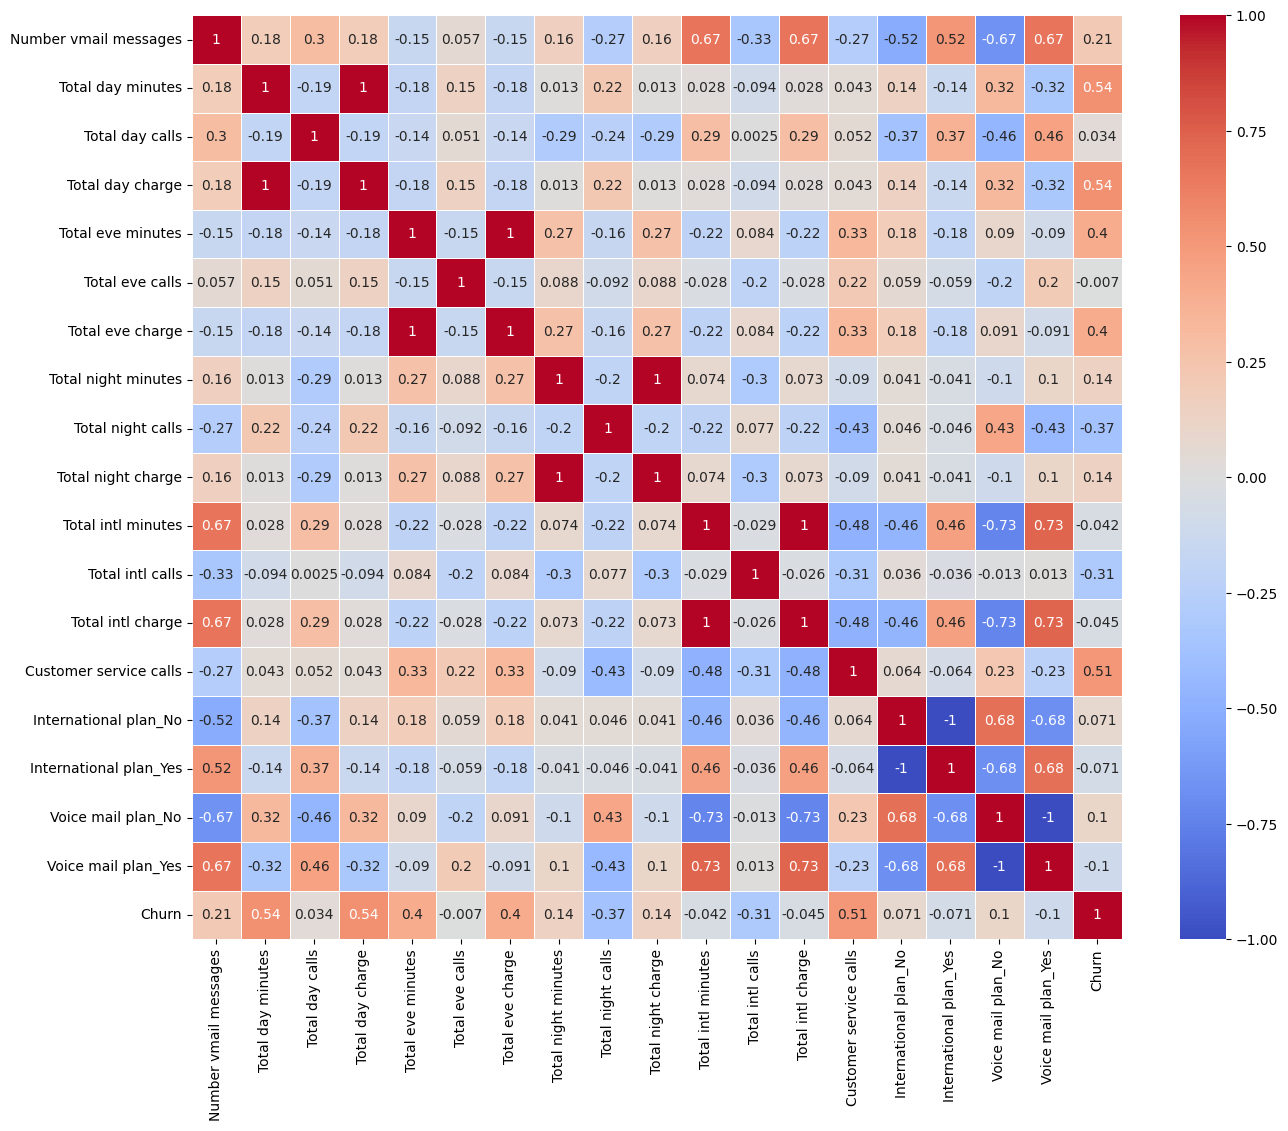

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,12))
sns.heatmap(preprocessed_dataframe.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()


In [5]:
train_config_path = 'configs/train_config.yaml'
best_model = hp_tuning_select_best_model(train_config_path)
best_model

c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:347: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.4.2 when using version 1.3.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:347: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier from version 1.4.2 when using version 1.3.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


RandomForestClassifier(max_depth=12, min_samples_leaf=3, n_estimators=400)

In [8]:
import shap

In [10]:
explainer = shap.TreeExplainer(model = best_model)
explainer

In [14]:


# Calculate Shap values
choosen_instance = preprocessed_dataframe.loc[[3]]
print(choosen_instance)
shap_values = explainer.shap_values(choosen_instance)
print(explainer.expected_value, shap_values)
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], choosen_instance)



   Number vmail messages  Total day minutes  Total day calls  \
3              -0.719359          -0.750152         1.420554   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
3         -0.750449           0.441574         0.413995          0.442612   

   Total night minutes  Total night calls  Total night charge  \
3             0.071152          -0.773227            0.071647   

   Total intl minutes  Total intl calls  Total intl charge  \
3           -1.905906         -0.135045          -1.907795   

   Customer service calls  International plan_No  International plan_Yes  \
3                1.906925                    1.0                     0.0   

   Voice mail plan_No  Voice mail plan_Yes  Churn  
3                 1.0                  0.0      0  
[0.85678076 0.14321924] [[[-6.59715217e-03  6.59715217e-03]
  [-6.23919661e-02  6.23919661e-02]
  [-1.12479029e-02  1.12479029e-02]
  [-5.68947321e-02  5.68947321e-02]
  [ 1.82932787e-02 -1.82932787e-02]

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:7                                                                                    │
│                                                                                                  │
│   4 shap_values = explainer.shap_values(choosen_instance)                                        │
│   5 print(explainer.expected_value, shap_values)                                                 │
│   6 shap.initjs()                                                                                │
│ ❱ 7 shap.force_plot(explainer.expected_value[1], shap_values[1], choosen_instance)               │
│   8                                                                                              │
│   9                                                                                              │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
IndexError: index 1 is out of bounds for axis 0 with size 1